# Examples and applications of the EUtils module     

The example here below are extracted from (perl code)

http://www.ncbi.nlm.nih.gov/books/NBK25498/#chapter3
    
and used here below to show how 
- to use BioServices to access to EUtils, the Entrez utilities    
- call Etutils in a proper way (e.g., using EPost)

In [1]:
from bioservices import EUtils
e = EUtils()

# you should provide your email in one of the 3 following ways:
# e = EUTils(email="yours")
# e = EUtils(); e.email = "yours"
# fill the ./config/bioservices/bioservices.cfg with a section
#     [user]
#     email = yours

INFO:root:Initialising Efetch service (REST)


## ESearch and ESummary/EFetch example

In [5]:
# Download PubMed records that are indexed in MeSH for both asthma and 
# leukotrienes and were also published in 2009.
query = 'asthma[mesh]+AND+leukotrienes[mesh]+AND+2009[pdat]'
db = 'pubmed'

# here, we use the history that will populate in results the fields called WebEnv and query_key
results = e.ESearch(db, query, usehistory='y')
results.WebEnv
results.QueryKey

Exception: (410, u'Gone')

In [3]:
# How to figure out the correct parameter name for ESummary ?
e.get_esummary_params()


(eSummaryRequest){
   db = None
   id = None
   WebEnv = None
   query_key = None
   retstart = None
   retmax = None
   tool = "BioServices, 1.3.8"
   email = "cokelaer@ebi.ac.uk"
 }

In [4]:
# we can now resuse the query and webenv values
res = e.ESummary(db,  query_key=results.QueryKey, WebEnv=results.WebEnv)

NameError: name 'results' is not defined

In [24]:
data = e.EFetch(db,query_key=results.QueryKey, WebEnv=results.WebEnv, rettype="abstract", retmode="text")
print(data[0:200])

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): eutils.ncbi.nlm.nih.gov



1. Zhongguo Dang Dai Er Ke Za Zhi. 2009 Nov;11(11):909-12.

[Urinary leukotrience E(4) level in children with asthma].

[Article in Chinese]

He MJ(1), Chen Q, Liu JM.

Author information: 
(1)Depart


<h2>EPost and ESummary/EFetch example</h2>
- Input: List of Entrez UIDs (integer identifiers, e.g. PMID, GI, Gene ID)
- ESummary Output: XML Document Summaries
- EFetch Output: Formatted data records (e.g. abstracts, FASTA)


 List of Entrez UIDs (integer identifiers, e.g. PMID, GI, Gene ID)

In [25]:
db = 'protein'
id_list = '194680922,50978626,28558982,9507199,6678417'

In [26]:
results = e.EPost(db, id_list)

In [27]:
results

(reply){
   QueryKey = "1"
   WebEnv = "NCID_1_311096996_130.14.18.34_9001_1410196505_465456362_0MetA0_S_MegaStore_F_1"
 }

In [28]:
summary = e.ESummary(db, query_key=results.QueryKey, WebEnv=results.WebEnv)

In [29]:
summary = e.EFetch(db, query_key=results.QueryKey, WebEnv=results.WebEnv, retmode="text", rettype="fasta")

INFO:requests.packages.urllib3.connectionpool:Resetting dropped connection: eutils.ncbi.nlm.nih.gov


In [30]:
print(summary[0:500])


>gi|194680922|ref|XP_603356.4| PREDICTED: similar to Thyroid peroxidase precursor (TPO) [Bos taurus]
METAEVQKLPPTNRETRSVPSKKRGCGWVMEGHRQVLESLTPLKTTVLFTRNFMQKSQSQSLNISGPRVV
RGRWWFGPGLVWSQLEEGLWADGARFPVISAQKRCWQMRARAVLGVVLAVTCAGAVFSFLLRPGGLLWGE
TEESQVRGIVEASRLLVDKSVYAAMRRNLHKREVISPAQLLSFSKLPEPTSRAASRAAEVMEASVQEAAR
RGHLRSGPSQLPTDALSEGLLSAIANLSGCLPYMLPPRCPATCLASKYRLISGACNNRDHPRWGASNTAL
ARWLPPAYEDGISEPRGWNPHFLYKGFPLPPVREVTRRIIHASNEAVTGDDRYSDLLTAWGQYIDHDIAF
TPQSAAPSAPWVGADCQLTCEPRSPCFPIQLPANAAGPACLPFY


<h2>ELink – ESummary/Efetch</h2>

- Input: List of Entrez UIDs in database A (integer identifiers, e.g. PMID, GI, Gene ID)
- ESummary Output: Linked XML Document Summaries from database B
- EFetch Output: Formatted data records (e.g. abstracts, FASTA) from database B

In [31]:
dbfrom = 'protein'
db = 'gene'
linkname = 'protein_gene'
# here is the list of identifiers in protein database (GIs)
id_list = '194680922,50978626,28558982,9507199,6678417'

In [32]:
results = e.ELink(dbfrom, sid=id_list, db=db, linkname=linkname, cmd="neighbor_history")
QueryKey = results.LinkSet[0].LinkSetDbHistory[0].QueryKey

WebEnv = results.LinkSet[0].WebEnv
WebEnv

NCID_1_311097941_130.14.18.34_9001_1410196510_1820950996_0MetA0_S_MegaStore_F_1

In [33]:
# include the previous results (WEbEnv and querykey)  in a esummary call
summary = e.ESummary(db=db, query_key=QueryKey, WebEnv=WebEnv)

In [34]:
# example of contenst that can be extracted:
docsum = summary.DocSum[0]
docsum.Item[1]

(ItemType){
   _Type = "String"
   _Name = "Description"
   ItemContent = "thyroid peroxidase"
 }

In [35]:
data = e.EFetch(db=db, query_key=QueryKey, WebEnv=WebEnv, rettype="xml", retmode="xml")

INFO:requests.packages.urllib3.connectionpool:Resetting dropped connection: eutils.ncbi.nlm.nih.gov


In [36]:
data.root.getchildren()[0].getchildren()


[<Element 'Entrezgene_track-info' at 0x5415910>,
 <Element 'Entrezgene_type' at 0x5415d10>,
 <Element 'Entrezgene_source' at 0x5415ad0>,
 <Element 'Entrezgene_gene' at 0x52f68d0>,
 <Element 'Entrezgene_prot' at 0x521f710>,
 <Element 'Entrezgene_summary' at 0x521f590>,
 <Element 'Entrezgene_location' at 0x521f390>,
 <Element 'Entrezgene_gene-source' at 0x521fa90>,
 <Element 'Entrezgene_locus' at 0x521fad0>,
 <Element 'Entrezgene_properties' at 0x45a5710>,
 <Element 'Entrezgene_homology' at 0x45cbcd0>,
 <Element 'Entrezgene_comments' at 0x4761090>,
 <Element 'Entrezgene_unique-keys' at 0x95d99d0>,
 <Element 'Entrezgene_xtra-index-terms' at 0x95d9790>,
 <Element 'Entrezgene_xtra-properties' at 0x95d9650>]

<h2>ESearch - ELink - ESummary/EFetch</h2>
- Input: Entrez text query in database A
- ESummary Output: Linked XML Document Summaries from database B
- EFetch Output: Formatted data records (e.g. abstracts, FASTA) from database B

In [37]:
# Download protein FASTA records linked to abstracts published 
# in 2009 that are indexed in MeSH for both asthma and 
# leukotrienes.
db1 = 'pubmed'
db2 = 'protein'
linkname = 'pubmed_protein'
query = 'asthma[mesh]+AND+leukotrienes[mesh]+AND+2009[pdat]'

In [38]:
results = e.ESearch(db1, term=query, usehistory='y')

In [39]:
#call ELink with previous key and env
output = e.ELink(db1, db=db2, query_key=results.QueryKey, WebEnv=results.WebEnv, 
                 cmd="neighbor_history", linkname=linkname)

In [40]:
WebEnv2 = output.LinkSet[0].WebEnv

In [41]:
QueryKey2 = output.LinkSet[0].LinkSetDbHistory[0].QueryKey

In [42]:
docsums = e.ESummary(db=db2, query_key=QueryKey2, WebEnv=WebEnv2)

In [43]:
data = e.EFetch(db=db2, query_key=QueryKey2, WebEnv=WebEnv2, rettype="fasta", retmode="text")

INFO:requests.packages.urllib3.connectionpool:Resetting dropped connection: eutils.ncbi.nlm.nih.gov


In [44]:
print(data)

>gi|16924014|ref|NP_476492.1| C-C motif chemokine 17 precursor [Rattus norvegicus]
MMSLQMLLLAALLLGTSLQHASAARATNVGRECCLDYFKGAIPIRKLVTWFRTSVECPKDAIVFETVQGR
LICTDPKDKHVKKAIRHLKNQRL

>gi|8392897|ref|NP_058956.1| arachidonate 5-lipoxygenase-activating protein [Rattus norvegicus]
MDQEAVGNVVLLAIVTLISVVQNAFFAHKVELESKAQSGRSFQRTGTLAFERVYTANQNCVDAYPTFLVV
LWTAGLLCSQVPAAFAGLMYLFVRQKYFVGYLGERTQSTPGYIFGKRIILFLFLMSLAGILNHYLIFFFG
SDFENYIRTITTTISPLLLIP




<h2>Application1: Converting GI numbers to accession numbers </h2>
- Goal: Starting with a list of nucleotide GI numbers, prepare a set of corresponding accession numbers.
- Solution: Use EFetch with &retttype=acc
- Input: $gi_list – comma-delimited list of GI numbers
- Output: List of accession numbers.

In [45]:
gi_list = '24475906,224465210,50978625,9507198';
output = e.EFetch('nucleotide', gi_list, rettype="acc")


INFO:requests.packages.urllib3.connectionpool:Resetting dropped connection: eutils.ncbi.nlm.nih.gov


In [46]:
print(output)

NM_009417.2
NM_000547.4
NM_001003009.1
NM_019353.1



In [47]:
#  The order of the accessions in the output will be the same order as the GI numbers in $gi_list.

Application 2: Converting accession numbers to data 
- Goal: Starting with a list of protein accession numbers, return the sequences in FASTA format.
- Solution: Create a string consisting of items separated by 'OR', where each item is an accession number followed by '[accn]'. Example: accn1[accn]+OR+accn2[accn]+OR+accn3[accn]+OR+…
- Submit this string as a &term in ESearch, then use EFetch to retrieve the FASTA data.
- Input: $acc_list – comma-delimited list of accessions
- Output: FASTA data 

In [48]:
acc_list = 'NM_009417,NM_000547,NM_001003009,NM_019353'
query = "+OR+".join(acc_list.split(","))


In [49]:
results = e.ESearch(db='nucleotide', term=query, usehistory='y')

In [50]:
results.WebEnv, results.QueryKey


(NCID_1_311102141_130.14.18.34_9001_1410196532_664070211_0MetA0_S_MegaStore_F_1,
 1)

In [51]:
# Note that there is maybe a typo on the NCBI website where protein is used in place of nucleotide. 
# If we set db=protein, we get a bd request response
data = e.EFetch('nucleotide', sid=None, query_key=results.QueryKey, WebEnv=results.WebEnv, rettype='fasta', retmode='text')
print(data[0:500])

INFO:requests.packages.urllib3.connectionpool:Resetting dropped connection: eutils.ncbi.nlm.nih.gov


>gi|253735815|ref|NM_000547.5| Homo sapiens thyroid peroxidase (TPO), transcript variant 1, mRNA
GGAAGGCAATTAAGGCGCCCATTTCAGAAGAGTTACAGCCGTGAAAATTACTCAGCAGTGCAGTTGGCTG
AGAAGAGGAAAAAAGGTCAGAATGAGAGCGCTCGCTGTGCTGTCTGTCACGCTGGTTATGGCCTGCACAG
AAGCCTTCTTCCCCTTCATCTCGAGAGGGAAAGAACTCCTTTGGGGAAAGCCTGAGGAGTCTCGTGTCTC
TAGCGTCTTGGAGGAAAGCAAGCGCCTGGTGGACACCGCCATGTACGCCACGATGCAGAGAAACCTCAAG
AAAAGAGGAATCCTTTCTCCAGCTCAGCTTCTGTCTTTTTCCAAACTTCCTGAGCCAACAAGCGGAGTGA
TTGCCCGAGCAGCAGAGATAATGGAAACATCAATACAAGCGATGAAAA


In [52]:
e._efetch.last_response.reason

'OK'

<h2>Application 3: Retrieving large datasets </h2>
- Goal: Download all chimpanzee mRNA sequences in FASTA format (>50,000 sequences).
- Solution: First use ESearch to retrieve the GI numbers for these sequences and post them on the History server, then use multiple EFetch calls to retrieve the data in batches of 500.
- Input: query – chimpanzee[orgn]+AND+biomol+mrna[prop]
- Output: A file named "chimp.fna" containing FASTA data.

In [53]:
query = 'chimpanzee[orgn]+AND+biomol+mrna[prop]'

In [54]:
output = e.ESearch(db='nucleotide', term=query, usehistory='y')

In [55]:
# there are lots of entries and we get only 20 by default
output.Count

156307

In [56]:
output.WebEnv, output.QueryKey

(NCID_1_311107112_130.14.22.215_9001_1410196538_271370888_0MetA0_S_MegaStore_F_1,
 1)

In [57]:
# very slow and large file. For demonstration, let us get only 4 batches of 500 sequences
retmax = 500
output.Count=1501
with open('chimp.rna', 'w') as fh:
    # retrieve data in batch of 500
    for i in range(0, int(output.Count)/retmax + 1):
        data = e.EFetch('nucleotide', WebEnv=output.WebEnv, retstart=i*retmax, query_key=output.QueryKey, 
                 retmax=retmax, retmode='text', rettype='fasta')
        fh.write(data)
        print("{0} batches out of {1} done".format(i+1, int(output.Count)/retmax+1))

# delete the file
#import os
#os.remove('chimp.rna')

INFO:requests.packages.urllib3.connectionpool:Resetting dropped connection: eutils.ncbi.nlm.nih.gov


1 batches out of 4 done
2 batches out of 4 done
3 batches out of 4 done
4 batches out of 4 done


<h2>Application 4: Finding unique sets of linked records for each member of a large dataset</h2>
- Goal: Download separately the SNP rs numbers (identifiers) for each current gene on human chromosome 20.
- Solution: First use ESearch to retrieve the Gene IDs for the genes, and then assemble an ELink URL where each Gene ID is submitted as a separate &id parameter.
- Input: query – human[orgn]+AND+20[chr]+AND+alive[prop]
- Output: A file named "snp_table" containing on each line the gene id followed by a colon (":") followed by a comma-delimited list of the linked SNP rs numbers.

In [63]:
query = 'human[orgn]+AND+20[chr]+AND+alive[prop]'
db1 = 'gene'
db2 = 'snp'
linkname = 'gene_snp'

Notes: The retmax parameter in the ESearch call is set to 5000, as this is a reasonable limit to the number of IDs to send to ELink in one request (if you send 5000 IDs, you are effectively performing 5000 ELink operations). If you need to link more than 5000 records, add &retstart to the ESearch call and repeat the entire procedure for each batch of 5000 IDs, incrementing &retstart for each batch like in application 3.


In [64]:
output = e.ESearch(db=db1, term=query, usehistory='y', RetMax=5000)

In [65]:
ids = output.IdList.Id[0:10]  # only 10 ids to speed up the example


Here, we retrieve 200 identifiers using the ELink method, which is based on WSDL. 
THe number of identifiers is limited to 200 with this service

In [66]:
results = e.ELink(db1, db=db2, linkname=linkname, sid=ids)

In [67]:
results.LinkSet[0].IdList.Id  # DO NOT print the entire structure, it's very large.

[598, 958, 1457, 1471, 1869, 2778, 4318, 5621, 6714, 6790]

On NCBI page, they use the REST service instead. You can manually call the service as follows so thast you can use HTTP POST request. With REST and a HTTP post request, you can get 5000 identifiers.

In [73]:
from bioservices import REST
elink = REST("elink", url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/')

INFO:root:Initialising elink service (REST)


In [74]:
ids = output.IdList.Id[0:00]

res = elink.http_post("elink.fcgi", frmt='xml', 
                params={'dbfrom':db1, 'db':db2, 'id':ids, 'linkname':linkname, 'retmode':'text'}, 
                headers={'Content-Type': 'application/x-www-form-urlencoded', 'User-Agent':'elink'} )

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): eutils.ncbi.nlm.nih.gov


In [ ]:
res = elink.easyXML(res)

In [ ]:
identifiers = {}

for link in res.root.getchildren():
    this_id = link.getchildren()[1].getchildren()[0].text
    links = [this.find('Id').text for this in link.find('LinkSetDb').findall('Link')]
    identifiers[this_id] = links[:]


In [ ]:
identifiers.keys()[0:10]



In [124]:
len(identifiers['4318'])

487

In [126]:
# plot the histogram of the number of links for each identifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


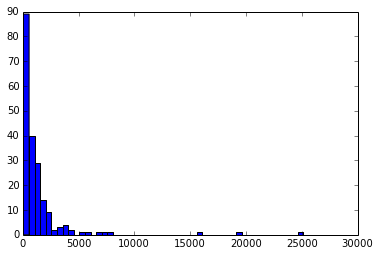

In [129]:
_ = hist([len(identifiers[k]) for k in identifiers.keys()], 50)